Original Source: https://www.kaggle.com/code/analyticaobscura/sleep-mind/notebook

# 1 Libraries and Utilities

## 1.1 Libraries

In [3]:
pip install pywaffle

     --------------------------------------- 25.6/25.6 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\luke\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
pip install Jinja2

     -------------------------------------- 134.9/134.9 KB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\luke\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pywaffle import Waffle
import warnings

# Filter warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# You can now proceed with your data analysis and visualization code
# using the imported libraries.

## 1.2 Loading data

In [47]:
df = pd.read_csv("G:\ÎÇ¥ ÎìúÎùºÏù¥Î∏å\DArtB\Kaggle Study\Sleep Health and Lifestyle Dataset\Sleep_health_and_lifestyle_dataset.csv") 
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [48]:
df1 = df.copy()     # We took a copy of our original data because we will be working on it.

## 1.3 Non-Null ValueCounts and Feature Datatypes

In [15]:
df.shape

(374, 13)

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## 1.4 Statistics of Categorical and Numerical Data

In [ ]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2).style.background_gradient(cmap='BuPu') # Jinja2ÎùºÎäî ÌÖúÌîåÎ¶ø ÏóîÏßÑÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÌëúÎ•º Íæ∏Î©∞Ï§ÄÎã§.

In [13]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2).style.set_properties(**{'background-color': '#4A235A','color': '#E2EEF3'})  

## 1.5 Initional insights about dataset

- Categorical Features: Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
- Binary Numerical Features: Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps

# 2. Visualization of Dataset

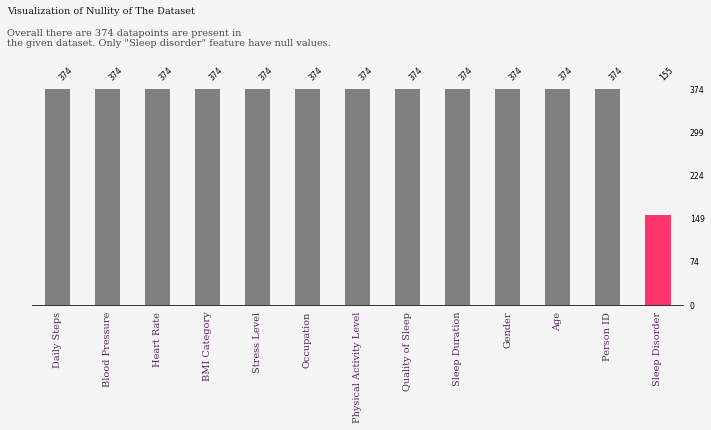

In [ ]:
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','#fe346e']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70) 
# fig (Ïï°Ïûê): Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùò ÌÅ¨Í∏∞, Ï†ÄÏû•, ÌÅ∞ Ï†úÎ™© Îì± Ï†ÑÎ∞òÏ†ÅÏù∏ ÌãÄÏùÑ Ï†úÏñ¥Ìï©ÎãàÎã§.
# ax (ÎèÑÌôîÏßÄ/Ï∫îÎ≤ÑÏä§): Ïã§Ï†ú Í∑∏ÎûòÌîÑ, Ï∂ï, ÎààÍ∏à, ÎùºÎ≤®, ÌÖçÏä§Ìä∏, Ï†úÎ™© Îì± Í∑∏ÎûòÌîÑÏùò Î™®Îì† ÏãúÍ∞ÅÏ†Å ÏöîÏÜåÎ•º ÏÑ∏Î∞ÄÌïòÍ≤å Ï†úÏñ¥Ìï©ÎãàÎã§.
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')

ax.text(-1,1.35,'Visualization of Nullity of The Dataset',{'font': 'Serif',  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'Overall there are 374 datapoints are present in \nthe given dataset. Only "Sleep disorder" feature have null values.',{'font': 'Serif',  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'Serif','weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()

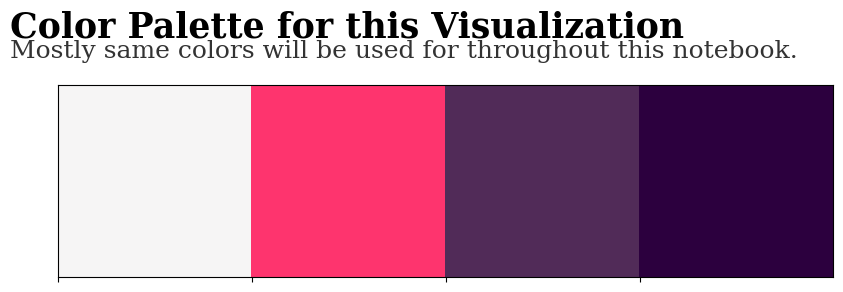

In [17]:
# color palette for visualizations
colors = ['#f6f5f5','#fe346e','#512b58','#2c003e']
palette = sns.color_palette( palette = colors)

sns.palplot(palette, size =2.5)
plt.text(-0.75,-0.75,'Color Palette for this Visualization', {'font':'serif', 'size':25, 'weight':'bold'})
plt.text(-0.75,-0.64,'Mostly same colors will be used for throughout this notebook.', {'font':'serif', 'size':18, 'weight':'normal'}, alpha = 0.8)
plt.show()

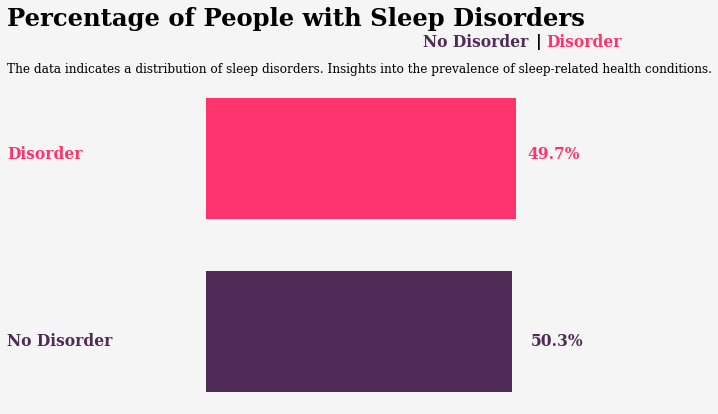

In [36]:
x = pd.DataFrame(df.groupby(['Sleep Disorder'])['Sleep Disorder'].count())

fig, ax = plt.subplots(figsize=(6, 6), dpi=70)
ax.barh([1], x['Sleep Disorder'][1], height=0.7, color='#fe346e')
plt.text(-50, -0.08, 'No Disorder', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#512b58'})
plt.text(x['Sleep Disorder'][1] * 1.05, -0.08, f'{(x["Sleep Disorder"][1] / x["Sleep Disorder"].sum() * 100):.1f}%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#512b58'})
ax.barh([0], x['Sleep Disorder'][0], height=0.7, color='#512b58')
plt.text(-50, 1, 'Disorder', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#fe346e'})
plt.text(x['Sleep Disorder'][0] * 1.05, 1, f'{(x["Sleep Disorder"][0] / x["Sleep Disorder"].sum() * 100):.1f}%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#fe346e'})
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-50, 1.77, 'Percentage of People with Sleep Disorders', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
plt.text(x['Sleep Disorder'][1] * 0.7, 1.65, 'No Disorder', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#512b58'})
plt.text(x['Sleep Disorder'][1] * 1.065, 1.655, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
plt.text(x['Sleep Disorder'][1] * 1.1, 1.65, 'Disorder', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#fe346e'})
plt.text(-50, 1.5, 'The data indicates a distribution of sleep disorders. Insights into the prevalence of sleep-related health conditions.', {'font': 'Serif', 'size': '12.5', 'color': 'black'})

# Removing axes and spines for cleaner look
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

# 3. Dataset Analysis

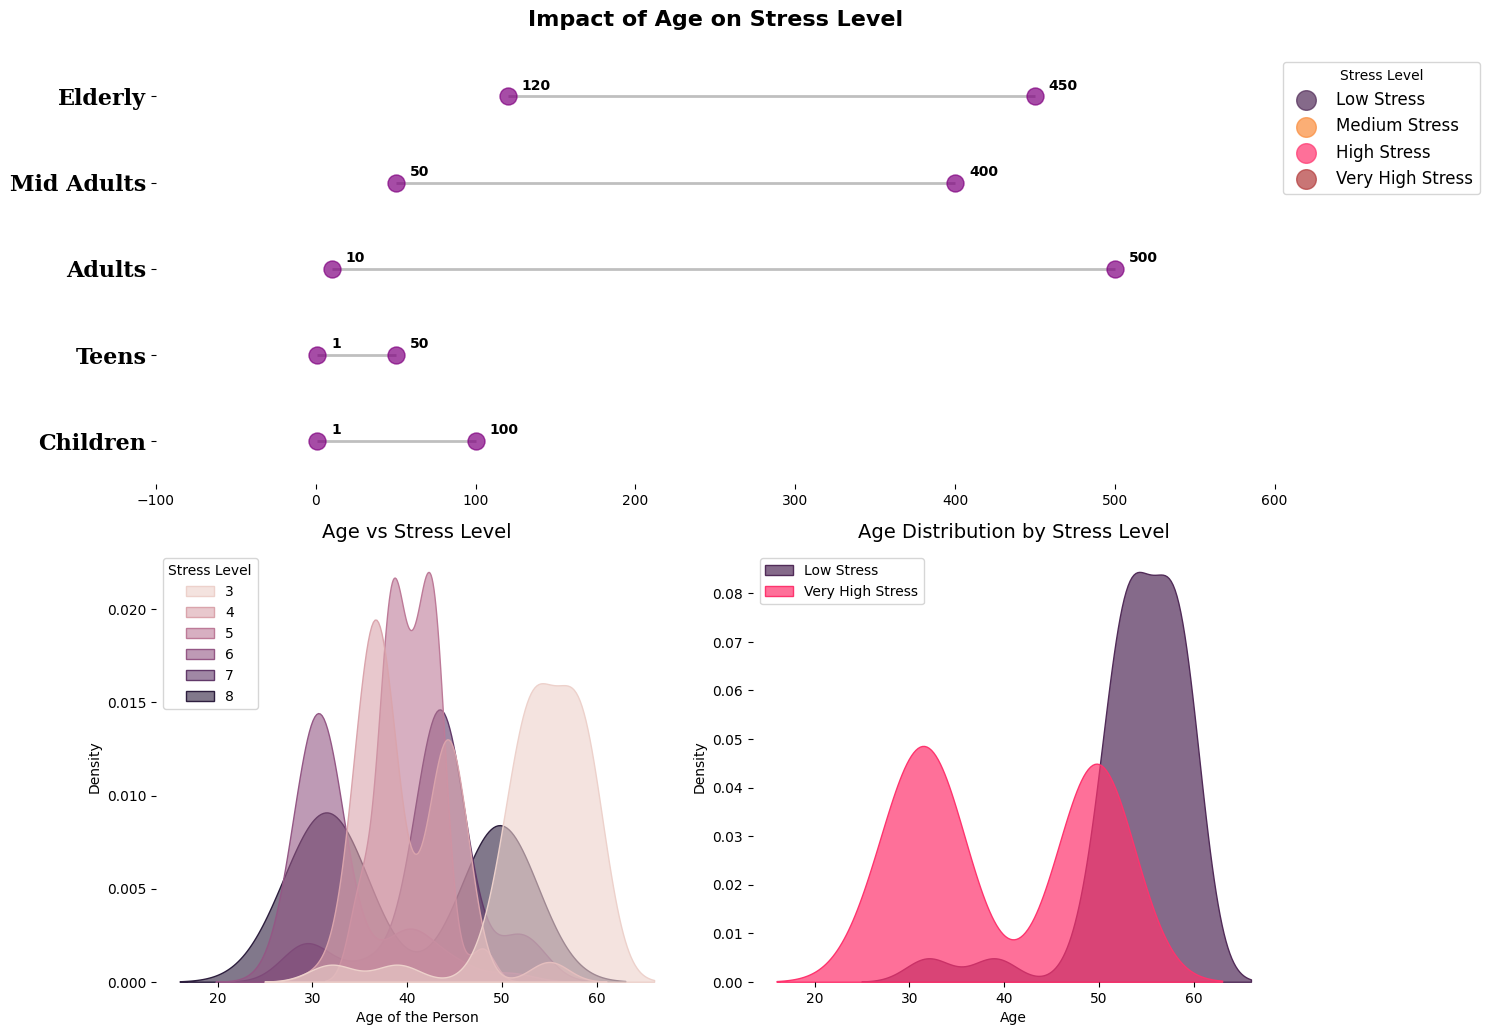

In [40]:
# Ïä§Ìä∏Î†àÏä§ Î†àÎ≤®ÏùÑ 4Í∞úÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú ÎÇòÎàÑÍ∏∞ ÏúÑÌïú Ï°∞Í±¥ ÏÑ§Ï†ï
conditions = [
    (df['Stress Level'] == 3),  # Low Stress
    (df['Stress Level'] == 4) | (df['Stress Level'] == 5),  # Medium Stress
    (df['Stress Level'] == 6) | (df['Stress Level'] == 7),  # High Stress
    (df['Stress Level'] == 8)   # Very High Stress
]
# Í∞Å Ï°∞Í±¥Ïóê Ìï¥ÎãπÌïòÎäî Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù¥Î¶Ñ
choices = ['Low Stress', 'Medium Stress', 'High Stress', 'Very High Stress']
# 'Stress Category'ÎùºÎäî ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏùÑ DataFrameÏóê Ï∂îÍ∞Ä
df['Stress Category'] = np.select(conditions, choices, default='Unknown')

# --- 1. Figure(Ïï°Ïûê)ÏôÄ Axes(Ï∫îÎ≤ÑÏä§) ÏÉùÏÑ± ---
plt.style.use('default')
# Figure Í∞ùÏ≤¥(Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùò ÌãÄ, Ïï°Ïûê)Î•º ÏÉùÏÑ±. ÌÅ¨Í∏∞ÏôÄ Î∞∞Í≤ΩÏÉâ ÏßÄÏ†ï
fig = plt.figure(figsize=(15, 15), facecolor='white')

# subplot2gridÎ•º ÏÇ¨Ïö©Ìï¥ 3x2 Í≤©Ïûê Î†àÏù¥ÏïÑÏõÉÏùÑ ÎßåÎì§Í≥†, Í∞Å Axes(Ï∫îÎ≤ÑÏä§)Î•º Î∞∞Ïπò
# ax1: 3x2 Í≤©ÏûêÏùò (0,0) ÏúÑÏπòÏóêÏÑú 2Ïπ∏ÏùÑ Ï∞®ÏßÄÌïòÎäî, Îß® ÏúÑÏùò ÎÑìÏùÄ Ï∫îÎ≤ÑÏä§
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
# ax2: (1,0) ÏúÑÏπòÏùò, Îëê Î≤àÏß∏ Ï§Ñ ÏôºÏ™Ω Ï∫îÎ≤ÑÏä§
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=1)
# ax3: (1,1) ÏúÑÏπòÏùò, Îëê Î≤àÏß∏ Ï§Ñ Ïò§Î•∏Ï™Ω Ï∫îÎ≤ÑÏä§
ax3 = plt.subplot2grid((3, 2), (1, 1), colspan=1)

# --- Í≥µÌÜµ Ïä§ÌÉÄÏùº Ï†ÅÏö© ---
# ÏÉùÏÑ±Îêú Î™®Îì† Ï∫îÎ≤ÑÏä§(ax1, ax2, ax3)Ïóê ÎåÄÌï¥ Î∞òÎ≥µÎ¨∏ÏúºÎ°ú Í≥µÌÜµ Ïä§ÌÉÄÏùº ÏßÄÏ†ï
for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('white')  # Í∞Å Ï∫îÎ≤ÑÏä§Ïùò Î∞∞Í≤ΩÏÉâÏùÑ Ìù∞ÏÉâÏúºÎ°ú
    ax.grid(False)             # Í∑∏Î¶¨Îìú(Í≤©ÏûêÎ¨¥Îä¨) ÎÅÑÍ∏∞
    for spine in ax.spines.values(): # Í∞Å Ï∫îÎ≤ÑÏä§Ïùò Î™®Îì† ÌÖåÎëêÎ¶¨(spines)Î•º
        spine.set_visible(False)   # Î≥¥Ïù¥ÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨

# --- Í∞Å Ïä§Ìä∏Î†àÏä§ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ ---
low_stress = df[df['Stress Category'] == 'Low Stress'].Age.value_counts()
# (Ï£ºÏùò: ÏõêÎ≥∏ ÏΩîÎìúÏóê 'Medium Stress 'Ï≤òÎüº Îí§Ïóê Í≥µÎ∞±Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº ÌôïÏù∏Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§.)
medium_stress = df[df['Stress Category'] == 'Medium Stress '].Age.value_counts()
high_stress = df[df['Stress Category'] == 'High Stress '].Age.value_counts()
very_high_stress = df[df['Stress Category'] == 'Very High Stress'].Age.value_counts()

# -----------------------------------------------------------------
# üé® Ï∫îÎ≤ÑÏä§ 1 (ax1) ÎîîÏûêÏù∏: MatplotlibÏúºÎ°ú ÏßÅÏ†ë Í∑∏Î¶¨Îäî Ïª§Ïä§ÌÖÄ Ï∞®Ìä∏
# -----------------------------------------------------------------
# yÏ∂ï Ï¢åÌëúÏôÄ Îç§Î≤® Ï∞®Ìä∏Ïùò Î∞∞Í≤ΩÏù¥ Îê† Í∞ÄÎ°úÏÑ†(hlines)Ïùò xÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
y_coords = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly']
xmin_values = [100, 50, 500, 400, 450]
xmax_values = [1, 1, 10, 50, 120]

# ax1 Ï∫îÎ≤ÑÏä§Ïóê ÌöåÏÉâ Í∞ÄÎ°úÏÑ†ÏùÑ Í∑∏Î†§ Í∞ÄÏù¥ÎìúÎùºÏù∏ ÏÉùÏÑ±
ax1.hlines(y=y_coords, xmin=xmin_values, xmax=xmax_values,
           color='grey', alpha=0.5, linewidth=2)

# Í∞ÄÏù¥ÎìúÎùºÏù∏Ïùò ÏãúÏûëÏ†êÍ≥º ÎÅùÏ†êÏóê Î≥¥ÎùºÏÉâ Ï†êÍ≥º Ïà´Ïûê(Ï¢åÌëúÍ∞í)Î•º Ï∂îÍ∞Ä
for i, (y, xmin, xmax) in enumerate(zip(y_coords, xmin_values, xmax_values)):
    # ÏãúÏûëÏ†ê
    ax1.scatter(xmin, y, color='purple', s=150, alpha=0.7, zorder=5)
    ax1.annotate(f'{xmin}', (xmin, y), xytext=(10, 5), textcoords='offset points', fontsize=10, fontweight='bold')
    # ÎÅùÏ†ê
    ax1.scatter(xmax, y, color='purple', s=150, alpha=0.7, zorder=5)
    ax1.annotate(f'{xmax}', (xmax, y), xytext=(10, 5), textcoords='offset points', fontsize=10, fontweight='bold')

# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î•º ax1 Ï∫îÎ≤ÑÏä§ ÏúÑÏóê ÏÇ∞Ï†êÎèÑ(scatter plot)Î°ú ÌîåÎ°úÌåÖ
scatter_size = 200
ax1.scatter(low_stress.values, low_stress.index, s=scatter_size, color='#512b58', alpha=0.7, label='Low Stress')
ax1.scatter(medium_stress.values, medium_stress.index, s=scatter_size, color='#fa8c3b', alpha=0.7, label='Medium Stress')
ax1.scatter(high_stress.values, high_stress.index, s=scatter_size, color='#fe346e', alpha=0.7, label='High Stress')
ax1.scatter(very_high_stress.values, very_high_stress.index, s=scatter_size, color='#b33b3b', alpha=0.7, label='Very High Stress')

# ax1 Ï∫îÎ≤ÑÏä§Ïùò x, yÏ∂ï Î≤îÏúÑÏôÄ ÎùºÎ≤® Ïä§ÌÉÄÏùºÏùÑ ÏÑ∏Î∂ÄÏ†ÅÏúºÎ°ú ÏÑ§Ï†ï
ax1.set_xlim(-100, 600)
ax1.set_ylim(-0.5, 4.5)
ax1.set_yticklabels(labels=['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],
                   fontdict={'font':'Serif', 'fontsize':16, 'fontweight':'bold', 'color':'black'})
# ax1 Ï∫îÎ≤ÑÏä§Ïùò Ï†úÎ™© ÏÑ§Ï†ï
ax1.set_title('Impact of Age on Stress Level', pad=20, fontsize=16, fontweight='bold')
# ax1 Ï∫îÎ≤ÑÏä§Ïùò Î≤îÎ°Ä ÏúÑÏπòÏôÄ Ïä§ÌÉÄÏùº ÏßÄÏ†ï
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title='Stress Level')


# -----------------------------------------------------------------
# üìä Ï∫îÎ≤ÑÏä§ 2 (ax2) ÎîîÏûêÏù∏: SeabornÏúºÎ°ú Í∑∏Î¶¨Îäî Î∞ÄÎèÑ ÌîåÎ°Ø
# -----------------------------------------------------------------
# ax=ax2 ÏòµÏÖòÏùÑ ÌÜµÌï¥, SeabornÏù¥ ax2 Ï∫îÎ≤ÑÏä§ ÏúÑÏóê Í∑∏Î¶¨ÎèÑÎ°ù ÏßÄÏ†ï
sns.kdeplot(data=df, x='Age', hue='Stress Level', fill=True, alpha=0.6, ax=ax2)
# ax2 Ï∫îÎ≤ÑÏä§Ïùò Ï†úÎ™©Í≥º xÏ∂ï ÎùºÎ≤®ÏùÑ ÏÑ§Ï†ï
ax2.set_title('Age vs Stress Level', fontsize=14, pad=10)
ax2.set_xlabel('Age of the Person', fontsize=10)


# -----------------------------------------------------------------
# üìä Ï∫îÎ≤ÑÏä§ 3 (ax3) ÎîîÏûêÏù∏: SeabornÏúºÎ°ú Í∑∏Î¶¨Îäî Î∞ÄÎèÑ ÌîåÎ°Ø
# -----------------------------------------------------------------
# ax=ax3 ÏòµÏÖòÏùÑ ÌÜµÌï¥, SeabornÏù¥ ax3 Ï∫îÎ≤ÑÏä§ ÏúÑÏóê Í∑∏Î¶¨ÎèÑÎ°ù ÏßÄÏ†ï
sns.kdeplot(data=df[df['Stress Category'] == 'Low Stress'], x='Age', ax=ax3,
            shade=True, alpha=0.7, color='#512b58', label='Low Stress')
sns.kdeplot(data=df[df['Stress Category'] == 'Medium Stress '], x='Age', ax=ax3,
            shade=True, alpha=0.7, color='#fe346e', label='Medium Stress')
sns.kdeplot(data=df[df['Stress Category'] == 'High Stress '], x='Age', ax=ax3,
            shade=True, alpha=0.7, color='#fe346e', label='High Stress')
sns.kdeplot(data=df[df['Stress Category'] == 'Very High Stress'], x='Age', ax=ax3,
            shade=True, alpha=0.7, color='#fe346e', label='Very High Stress')

# ax3 Ï∫îÎ≤ÑÏä§Ïùò Ï†úÎ™©, xÏ∂ï ÎùºÎ≤®, Î≤îÎ°ÄÎ•º ÏÑ§Ï†ï
ax3.set_title('Age Distribution by Stress Level', fontsize=14, pad=10)
ax3.set_xlabel('Age', fontsize=10)
ax3.legend()

# --- ÏµúÏ¢Ö ÎßàÎ¨¥Î¶¨ ---
# Figure(Ïï°Ïûê)Ïóê Ìè¨Ìï®Îêú Î™®Îì† Ï∫îÎ≤ÑÏä§Îì§Ïùò Î†àÏù¥ÏïÑÏõÉÏùÑ ÍπîÎÅîÌïòÍ≤å ÏûêÎèô Ï°∞Ï†ï
plt.tight_layout()
# ÏôÑÏÑ±Îêú FigureÎ•º ÌôîÎ©¥Ïóê ÌëúÏãú
plt.show()

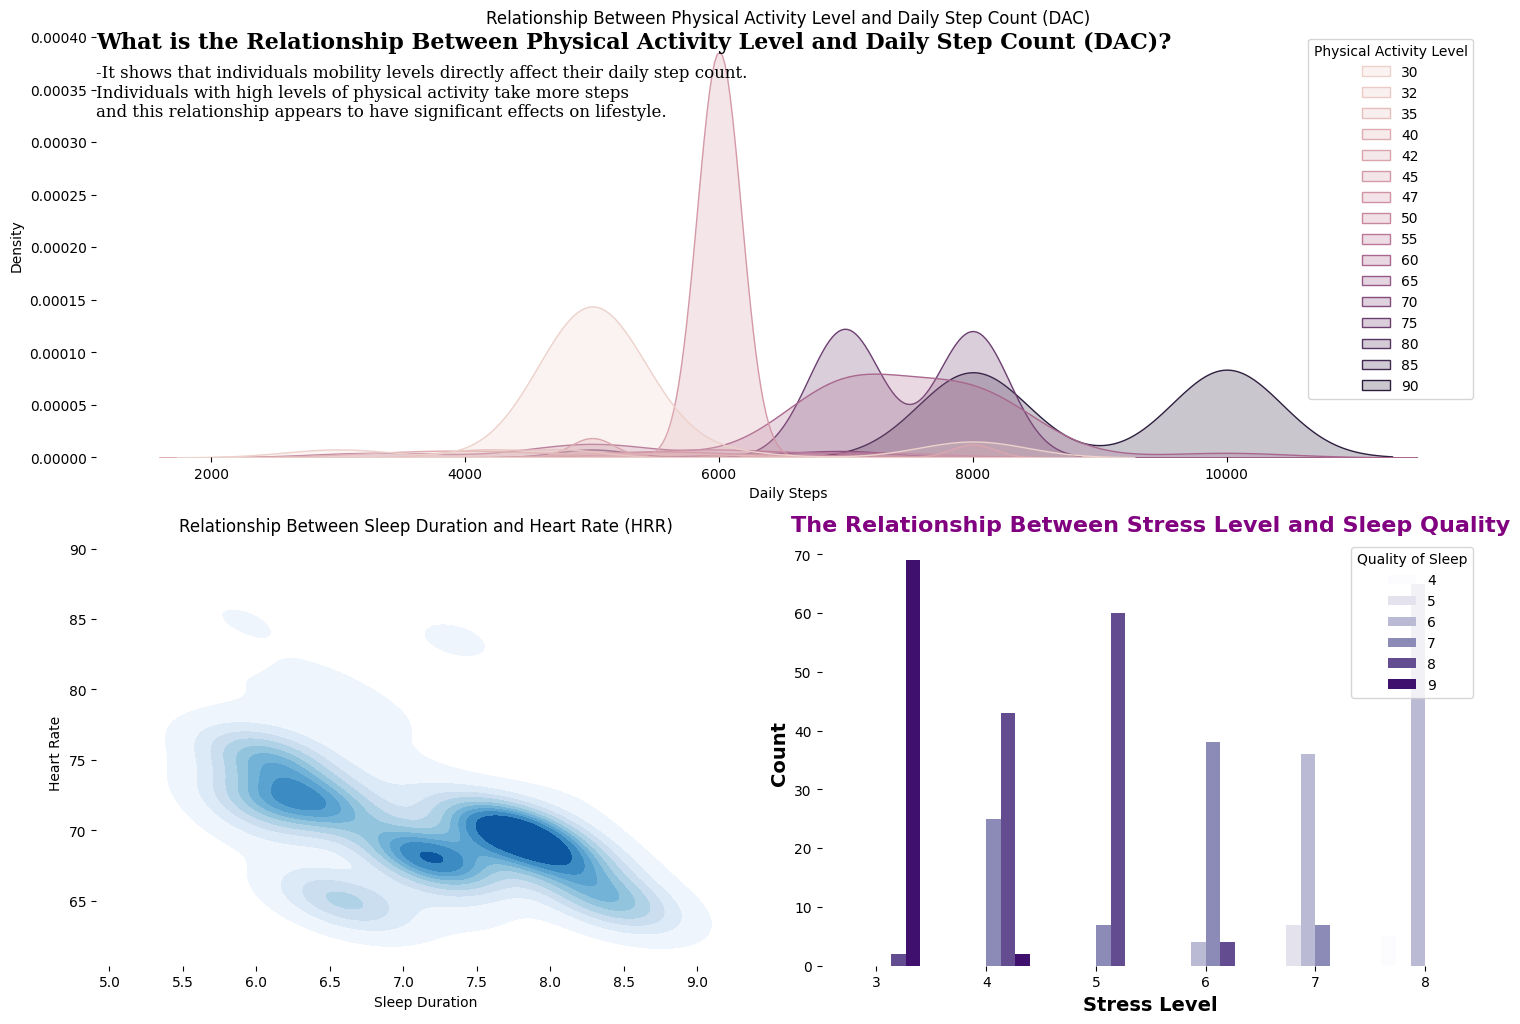

In [38]:
fig = plt.figure(figsize=(15, 15), facecolor='white')

ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2) 
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=1)  
ax3 = plt.subplot2grid((3, 2), (1, 1), colspan=1)  


for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('white')
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(False)



sns.kdeplot(data=df, x='Daily Steps', hue='Physical Activity Level', fill=True, ax=ax1)
ax1.set_title('Relationship Between Physical Activity Level and Daily Step Count (DAC)')
ax1.text(0, 1, 
         'What is the Relationship Between Physical Activity Level and Daily Step Count (DAC)?', 
         ha='left', va='top', 
         fontweight='bold', fontsize=16, 
         fontname='Serif', color='black', transform=ax1.transAxes)
ax1.text(0, 0.8, 
         '-It shows that individuals mobility levels directly affect their daily step count. \nIndividuals with high levels of physical activity take more steps \nand this relationship appears to have significant effects on lifestyle.', 
         fontsize=12, 
         fontname='Serif', color='black', transform=ax1.transAxes)


sns.kdeplot(data=df, x='Sleep Duration', y='Heart Rate', fill=True, cmap='Blues', ax=ax2)
ax2.set_title('Relationship Between Sleep Duration and Heart Rate (HRR)')

scatter_size = 200 

sns.countplot(x='Stress Level', hue='Quality of Sleep', data=df, ax=ax3, palette='Purples')
ax3.set_title('The Relationship Between Stress Level and Sleep Quality', fontsize=16, fontweight='bold', color='#800080')
ax3.set_xlabel('Stress Level', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count', fontsize=14, fontweight='bold')



plt.tight_layout()
plt.show()

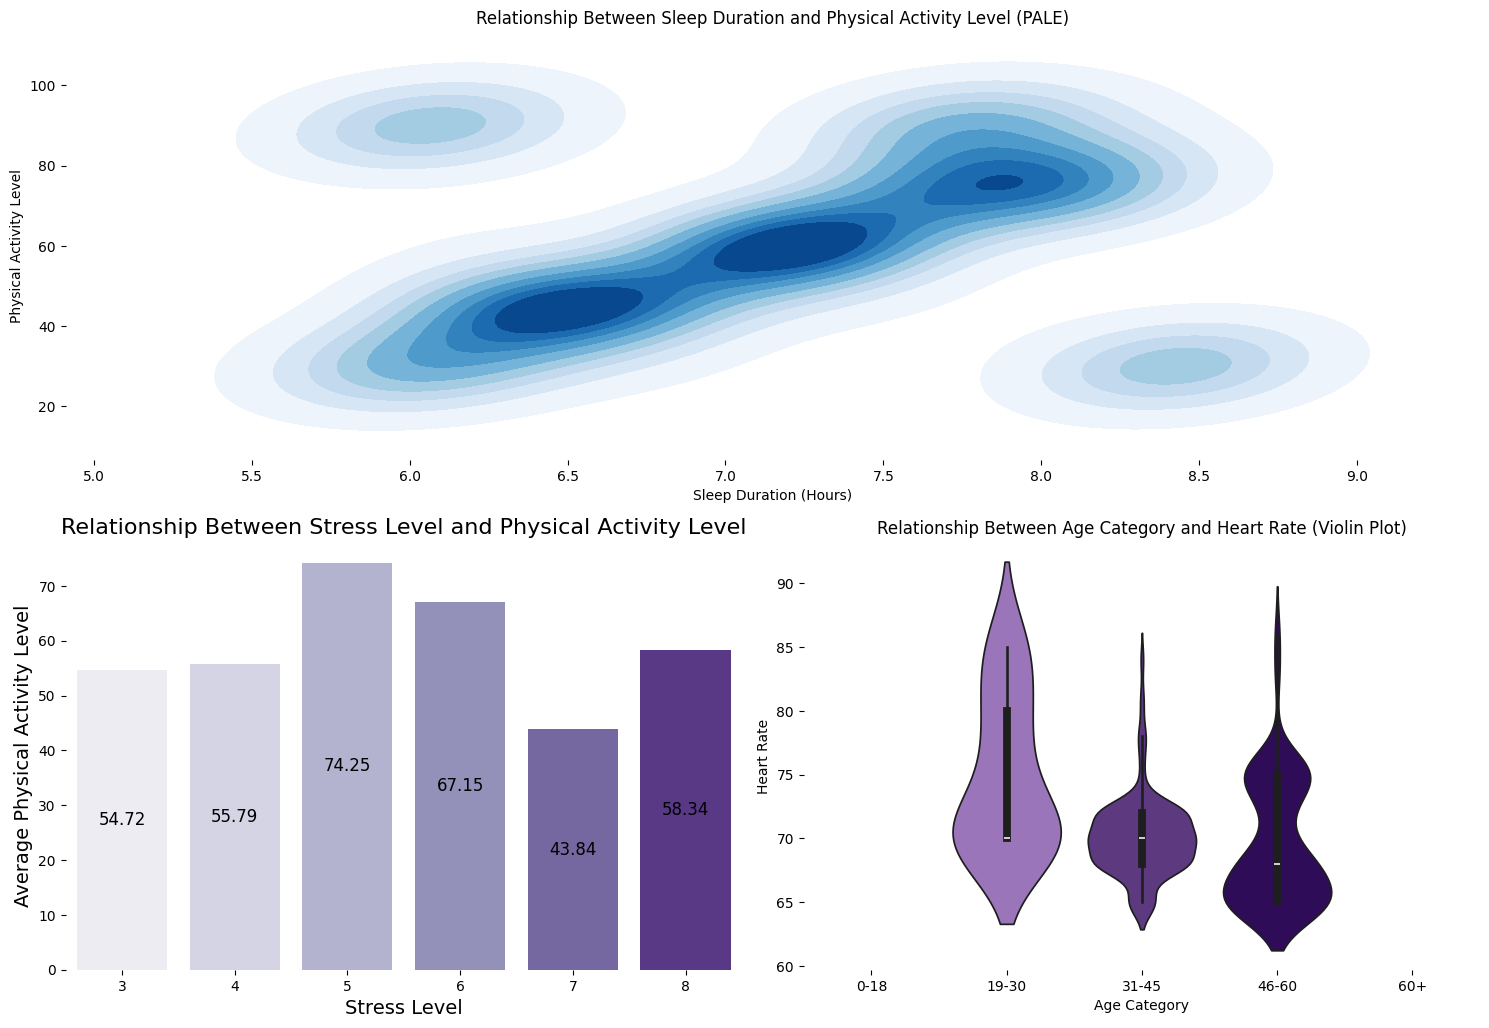

In [ ]:
# Ï†ÑÏ≤¥ Í∑∏Î¶º(figure) Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌïòÍ≥† ÌÅ¨Í∏∞ Î∞è Î∞∞Í≤ΩÏÉâÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.
# figsize=(15, 15)Îäî Í∑∏Î¶ºÏùò Í∞ÄÎ°ú, ÏÑ∏Î°ú ÌÅ¨Í∏∞Î•º Ïù∏Ïπò Îã®ÏúÑÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.
# facecolor='white'Îäî Í∑∏Î¶ºÏùò Î∞∞Í≤ΩÏÉâÏùÑ Ìù∞ÏÉâÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
fig = plt.figure(figsize=(15, 15), facecolor='white')

# subplot2gridÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∑∏Î¶¨Îìú Í∏∞Î∞òÏùò ÏÑúÎ∏åÌîåÎ°Ø Î†àÏù¥ÏïÑÏõÉÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
# (3, 2)Îäî 3Ìñâ 2Ïó¥Ïùò Í∑∏Î¶¨ÎìúÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§.
# (0, 0), colspan=2: Ï≤´ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø (ax1)ÏùÄ 0Ìñâ 0Ïó¥ÏóêÏÑú ÏãúÏûëÌïòÏó¨ 2Ïπ∏(Ï†ÑÏ≤¥ ÎÑàÎπÑ)ÏùÑ Ï∞®ÏßÄÌï©ÎãàÎã§. (ÏÉÅÎã® Ï†ÑÏ≤¥)
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
# (1, 0), colspan=1: Îëê Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø (ax2)ÏùÄ 1Ìñâ 0Ïó¥ÏóêÏÑú ÏãúÏûëÌïòÏó¨ 1Ïπ∏ÏùÑ Ï∞®ÏßÄÌï©ÎãàÎã§. (Ï§ëÍ∞Ñ ÏôºÏ™Ω)
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=1)
# (1, 1), colspan=1: ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø (ax3)ÏùÄ 1Ìñâ 1Ïó¥ÏóêÏÑú ÏãúÏûëÌïòÏó¨ 1Ïπ∏ÏùÑ Ï∞®ÏßÄÌï©ÎãàÎã§. (Ï§ëÍ∞Ñ Ïò§Î•∏Ï™Ω)
ax3 = plt.subplot2grid((3, 2), (1, 1), colspan=1)

# ---

# Í∞Å ÏÑúÎ∏åÌîåÎ°Ø(ax1, ax2, ax3)Ïùò Í≥µÌÜµÏ†ÅÏù∏ ÏãúÍ∞ÅÏ†Å ÏÜçÏÑ±ÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.
for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('white') # ÏÑúÎ∏åÌîåÎ°ØÏùò Î∞∞Í≤ΩÏÉâÏùÑ Ìù∞ÏÉâÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
    ax.grid(False) # Í∑∏Î¶¨Îìú ÏÑ†ÏùÑ ÌëúÏãúÌïòÏßÄ ÏïäÏäµÎãàÎã§.
    for spine in ax.spines.values(): # Í∑∏ÎûòÌîÑ ÌÖåÎëêÎ¶¨Ïùò Î™®Îì† 'spine' (ÏÑ†)Ïóê Ï†ëÍ∑ºÌï©ÎãàÎã§.
        spine.set_visible(False) # ÌÖåÎëêÎ¶¨ ÏÑ†ÏùÑ Î≥¥Ïù¥ÏßÄ ÏïäÍ≤å Ìï©ÎãàÎã§.

# ---

# Ï≤´ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø (ax1): ÏàòÎ©¥ ÏãúÍ∞ÑÍ≥º Ïã†Ï≤¥ ÌôúÎèô ÏàòÏ§Ä Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
# sns.kdeplot: Ïª§ÎÑê Î∞ÄÎèÑ Ï∂îÏ†ï ÌîåÎ°Ø (Kernel Density Estimate Plot)ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
# x='Sleep Duration', y='Physical Activity Level': xÏ∂ïÍ≥º yÏ∂ïÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïó¥ÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§.
# data=df: ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§.
# fill=True: Î∞ÄÎèÑ ÏòÅÏó≠ÏùÑ ÏÉâÏÉÅÏúºÎ°ú Ï±ÑÏõÅÎãàÎã§.
# cmap='Blues': ÏÉâÏÉÅ ÎßµÏùÑ 'Blues' Í≥ÑÏó¥Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§ (ÌååÎûÄÏÉâ Í≥ÑÏó¥).
# ax=ax1: Ïù¥ ÌîåÎ°ØÏùÑ ax1 ÏÑúÎ∏åÌîåÎ°ØÏóê Í∑∏Î¶ΩÎãàÎã§.
sns.kdeplot(x='Sleep Duration', y='Physical Activity Level', data=df, fill=True, cmap='Blues', ax=ax1)
ax1.set_title('Relationship Between Sleep Duration and Physical Activity Level (PALE)') # ax1Ïùò Ï†úÎ™© ÏÑ§Ï†ï
ax1.set_xlabel('Sleep Duration (Hours)') # ax1Ïùò xÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï
ax1.set_ylabel('Physical Activity Level') # ax1Ïùò yÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï

# ---

# Îëê Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø (ax2): Ïä§Ìä∏Î†àÏä§ ÏàòÏ§ÄÍ≥º Ïã†Ï≤¥ ÌôúÎèô ÏàòÏ§Ä Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
# sns.barplot: ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
# x='Stress Level', y='Physical Activity Level': xÏ∂ïÍ≥º yÏ∂ïÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïó¥ÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§.
# data=df: ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§.
# estimator=np.mean: yÏ∂ï Í∞íÏúºÎ°ú Í∞Å xÍ∞íÏóê Ìï¥ÎãπÌïòÎäî 'Physical Activity Level'Ïùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
# ci=None: Ïã†Î¢∞ Íµ¨Í∞Ñ(confidence interval)ÏùÑ ÌëúÏãúÌïòÏßÄ ÏïäÏäµÎãàÎã§.
# ax=ax2: Ïù¥ ÌîåÎ°ØÏùÑ ax2 ÏÑúÎ∏åÌîåÎ°ØÏóê Í∑∏Î¶ΩÎãàÎã§.
# palette='Purples': ÏÉâÏÉÅ ÌåîÎ†àÌä∏Î•º 'Purples' Í≥ÑÏó¥Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§ (Î≥¥ÎùºÏÉâ Í≥ÑÏó¥).
sns.barplot(x='Stress Level', y='Physical Activity Level', data=df, estimator=np.mean, ci=None, ax=ax2, palette='Purples')
ax2.set_title('Relationship Between Stress Level and Physical Activity Level', fontsize=16) # ax2Ïùò Ï†úÎ™© ÏÑ§Ï†ï
ax2.set_xlabel('Stress Level', fontsize=14) # ax2Ïùò xÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï
ax2.set_ylabel('Average Physical Activity Level', fontsize=14) # ax2Ïùò yÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÌèâÍ∑† Í∞íÏùÑ ÌÖçÏä§Ìä∏Î°ú ÌëúÏãúÌï©ÎãàÎã§.
for p in ax2.patches: # ax2Ïùò Î™®Îì† ÎßâÎåÄ(Ìå®Ïπò)Î•º ÏàúÌöåÌï©ÎãàÎã§.
    # ÎßâÎåÄÏùò Ï§ëÏïô ÏÉÅÎã®Ïóê ÌÖçÏä§Ìä∏Î•º Î∞∞ÏπòÌïòÍ≥†, ÎÜíÏù¥ Í∞íÏùÑ ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãúÌï©ÎãàÎã§.
    ax2.text(p.get_x() + p.get_width() / 2., p.get_height() / 2, # ÌÖçÏä§Ìä∏Ïùò x, y Ï¢åÌëú ÏÑ§Ï†ï (ÎßâÎåÄ Ï§ëÏïô)
             f'{p.get_height():.2f}', # ÌÖçÏä§Ìä∏ ÎÇ¥Ïö© (ÎßâÎåÄ ÎÜíÏù¥, ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨)
             ha='center', va='center', fontsize=12, color='black') # ÌÖçÏä§Ìä∏ Ï†ïÎ†¨, Ìè∞Ìä∏ ÌÅ¨Í∏∞, ÏÉâÏÉÅ ÏÑ§Ï†ï

# ---

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê 'Age Category'ÎùºÎäî ÏÉàÎ°úÏö¥ Î≤îÏ£ºÌòï Ïó¥ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
bins = [0, 18, 30, 45, 60, 100] # ÎÇòÏù¥ Íµ¨Í∞ÑÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
labels = ['0-18', '19-30', '31-45', '46-60', '60+'] # Í∞Å Íµ¨Í∞ÑÏóê ÎåÄÌïú ÎùºÎ≤®ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
# pd.cut: 'Age' Ïó¥ÏùÑ ÏßÄÏ†ïÎêú binsÏóê Îî∞Îùº Î≤îÏ£ºÌôîÌïòÍ≥† labelsÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.
# right=False: Íµ¨Í∞ÑÏùò Ïò§Î•∏Ï™Ω Í≤ΩÍ≥ÑÍ∞Ä Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§ (Ïòà: 18 ÎØ∏Îßå).
df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# ---

# ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø (ax3): ÎÇòÏù¥ Î≤îÏ£ºÏôÄ Ïã¨Î∞ïÏàò Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
# sns.violinplot: Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°ØÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ÏôÄ Î∞ÄÎèÑÎ•º ÎèôÏãúÏóê Î≥¥Ïó¨Ï§çÎãàÎã§.
# x='Age Category', y='Heart Rate': xÏ∂ïÍ≥º yÏ∂ïÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïó¥ÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§.
# data=df: ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§.
# ax=ax3: Ïù¥ ÌîåÎ°ØÏùÑ ax3 ÏÑúÎ∏åÌîåÎ°ØÏóê Í∑∏Î¶ΩÎãàÎã§.
# palette: Í∞Å Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°ØÏóê Ï†ÅÏö©Ìï† ÏÉâÏÉÅ ÌåîÎ†àÌä∏Î•º ÏàòÎèôÏúºÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.
sns.violinplot(x='Age Category', y='Heart Rate', data=df, ax=ax3, palette=['#D8B7DD', '#9B6AC4', '#5D2E8C', '#2E0063'])
ax3.set_title('Relationship Between Age Category and Heart Rate (Violin Plot)') # ax3Ïùò Ï†úÎ™© ÏÑ§Ï†ï
ax3.set_xlabel('Age Category') # ax3Ïùò xÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï
ax3.set_ylabel('Heart Rate') # ax3Ïùò yÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï

# ---

# Î™®Îì† ÏÑúÎ∏åÌîåÎ°ØÏùò Î†àÏù¥ÏïÑÏõÉÏùÑ ÏûêÎèôÏúºÎ°ú Ï°∞Ï†ïÌïòÏó¨ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù Ìï©ÎãàÎã§.
plt.tight_layout()
# ÏÉùÏÑ±Îêú Î™®Îì† ÌîåÎ°ØÏùÑ ÌôîÎ©¥Ïóê ÌëúÏãúÌï©ÎãàÎã§.
plt.show()

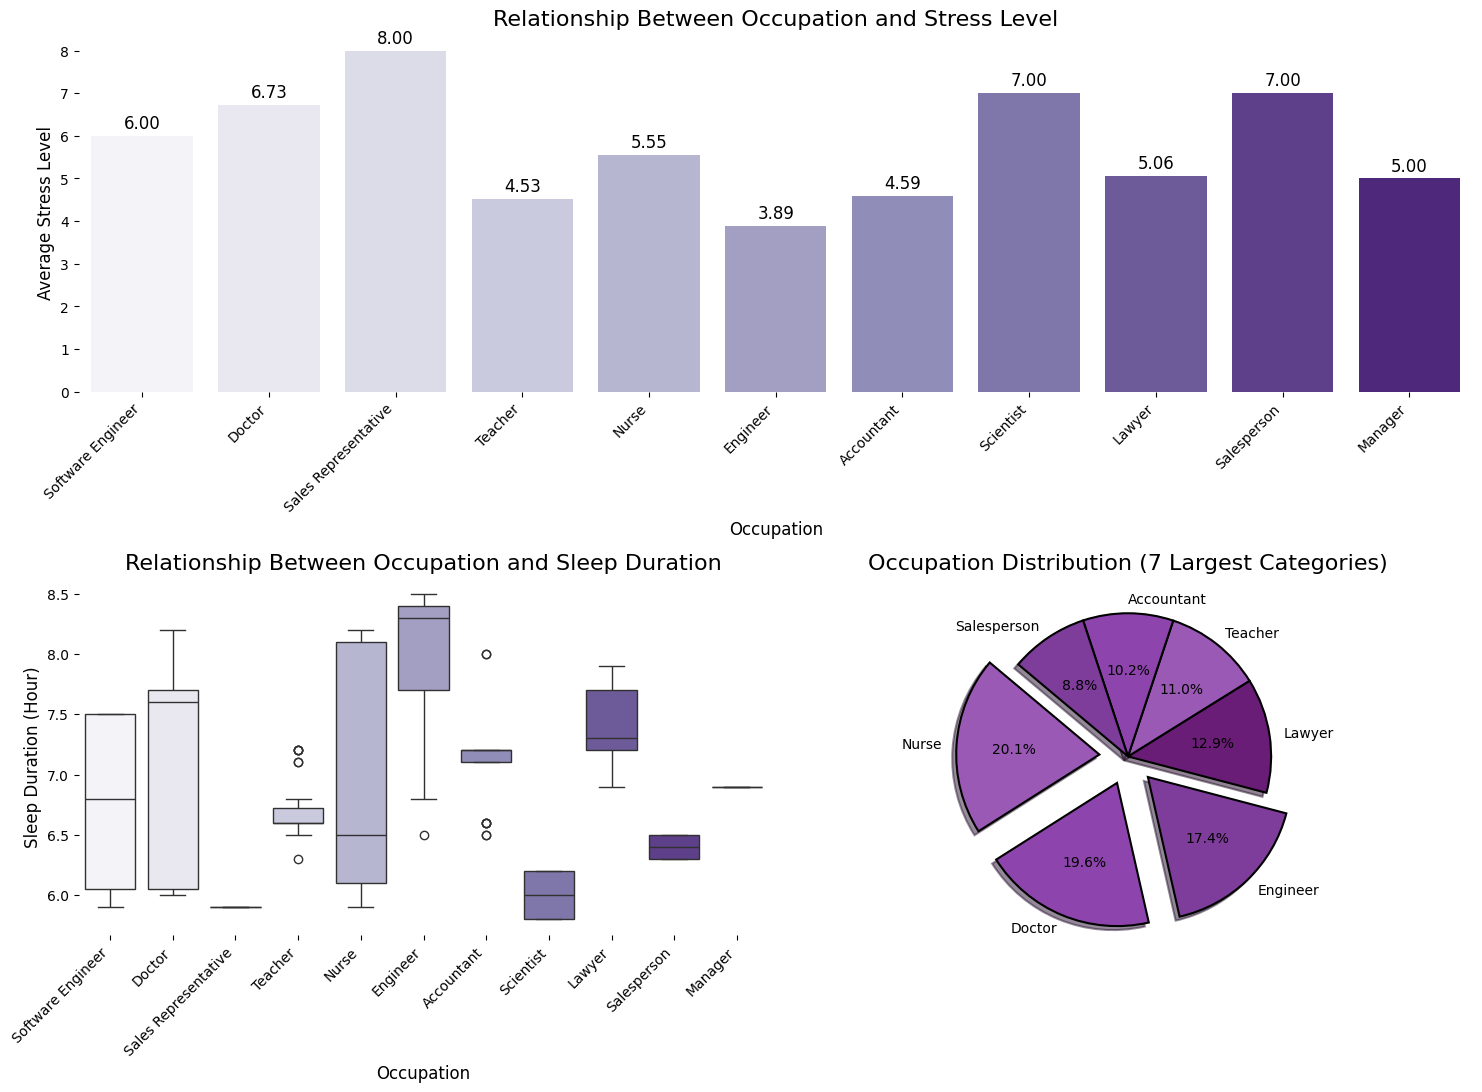

In [41]:
fig = plt.figure(figsize=(15, 15), facecolor='white')

ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2) 
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=1)  
ax3 = plt.subplot2grid((3, 2), (1, 1), colspan=1)  


for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('white')
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(False)


sns.barplot(x='Occupation', y='Stress Level', data=df, estimator=np.mean, ci=None, 
            palette='Purples', ax=ax1)  
ax1.set_title('Relationship Between Occupation and Stress Level', fontsize=16)
ax1.set_xlabel('Occupation', fontsize=12)
ax1.set_ylabel('Average Stress Level', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=12, color='black', 
                 xytext=(0, 9), textcoords='offset points')


sns.boxplot(x='Occupation', y='Sleep Duration', data=df, palette='Purples', ax=ax2) 
ax2.set_title('Relationship Between Occupation and Sleep Duration', fontsize=16)
ax2.set_xlabel('Occupation', fontsize=12)
ax2.set_ylabel('Sleep Duration (Hour)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


occupation_counts = df['Occupation'].value_counts().head(7)
colors = ['#9b59b6', '#8e44ad', '#7f3d9b', '#6a1d77', '#9b59b6', '#8e44ad', '#7f3d9b']
explode = [0.2 if i < 3 else 0 for i in range(len(occupation_counts))]

ax3.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', colors=colors, 
       startangle=140, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})


ax3.set_title('Occupation Distribution (7 Largest Categories)', fontsize=16)
ax3.set_aspect('equal')

plt.tight_layout()
plt.show()

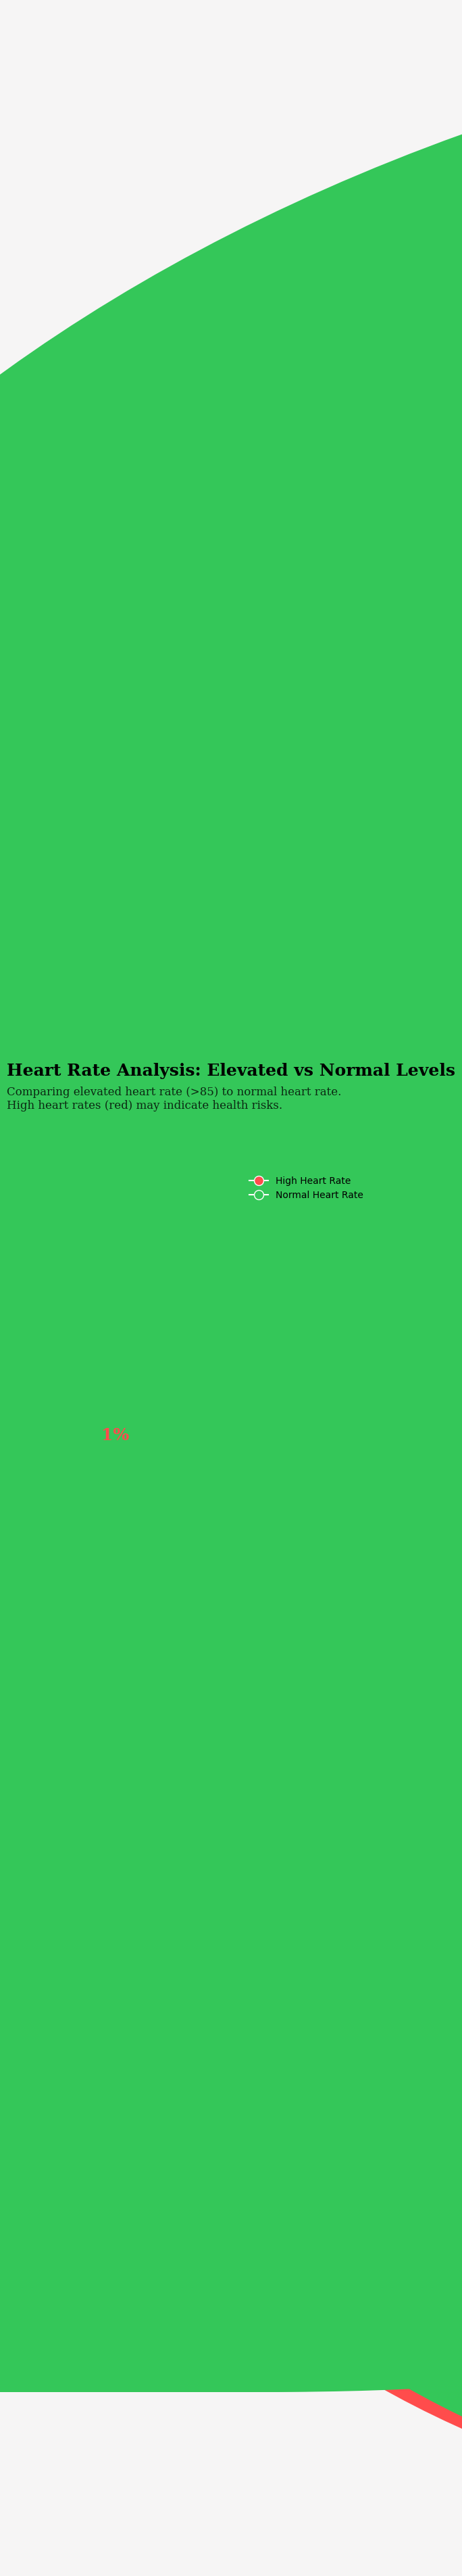

In [42]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

high_heart_rate = df[df['Heart Rate'] > 85]['Heart Rate'].count()  
normal_heart_rate = df[df['Heart Rate'] <= 85]['Heart Rate'].count()

total = high_heart_rate + normal_heart_rate
high_percentage = int(round(high_heart_rate / total * 100, 0))
normal_percentage = int(round(normal_heart_rate / total * 100, 0))

fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    columns=14,
    values={"High Heart Rate": high_heart_rate, "Normal Heart Rate": normal_heart_rate},
    colors=['#ff4c4c', '#34c759'],  
    icons='heartbeat',
    icon_size=20,
    icon_legend=True,
    figsize=(7, 7),
    facecolor='#f6f5f5',
    dpi=100
)

fig.text(0.05, 0.92, 'Heart Rate Analysis: Elevated vs Normal Levels', {'font': 'Serif', 'size': 18, 'color': 'black', 'weight': 'bold'})
fig.text(0.05, 0.85, 'Comparing elevated heart rate (>85) to normal heart rate.\nHigh heart rates (red) may indicate health risks.', 
         {'font': 'Serif', 'size': 12, 'color': 'black'}, alpha=0.8)


fig.text(0.25, 0.15, '{}%'.format(high_percentage), {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#ff4c4c'})
fig.text(0.65, 0.15, '{}%'.format(normal_percentage), {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#34c759'})


plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff4c4c', markersize=10, label='High Heart Rate'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#34c759', markersize=10, label='Normal Heart Rate')
    ],
    loc='upper right', bbox_to_anchor=(0.9, 1.1), frameon=False
)

fig.show()

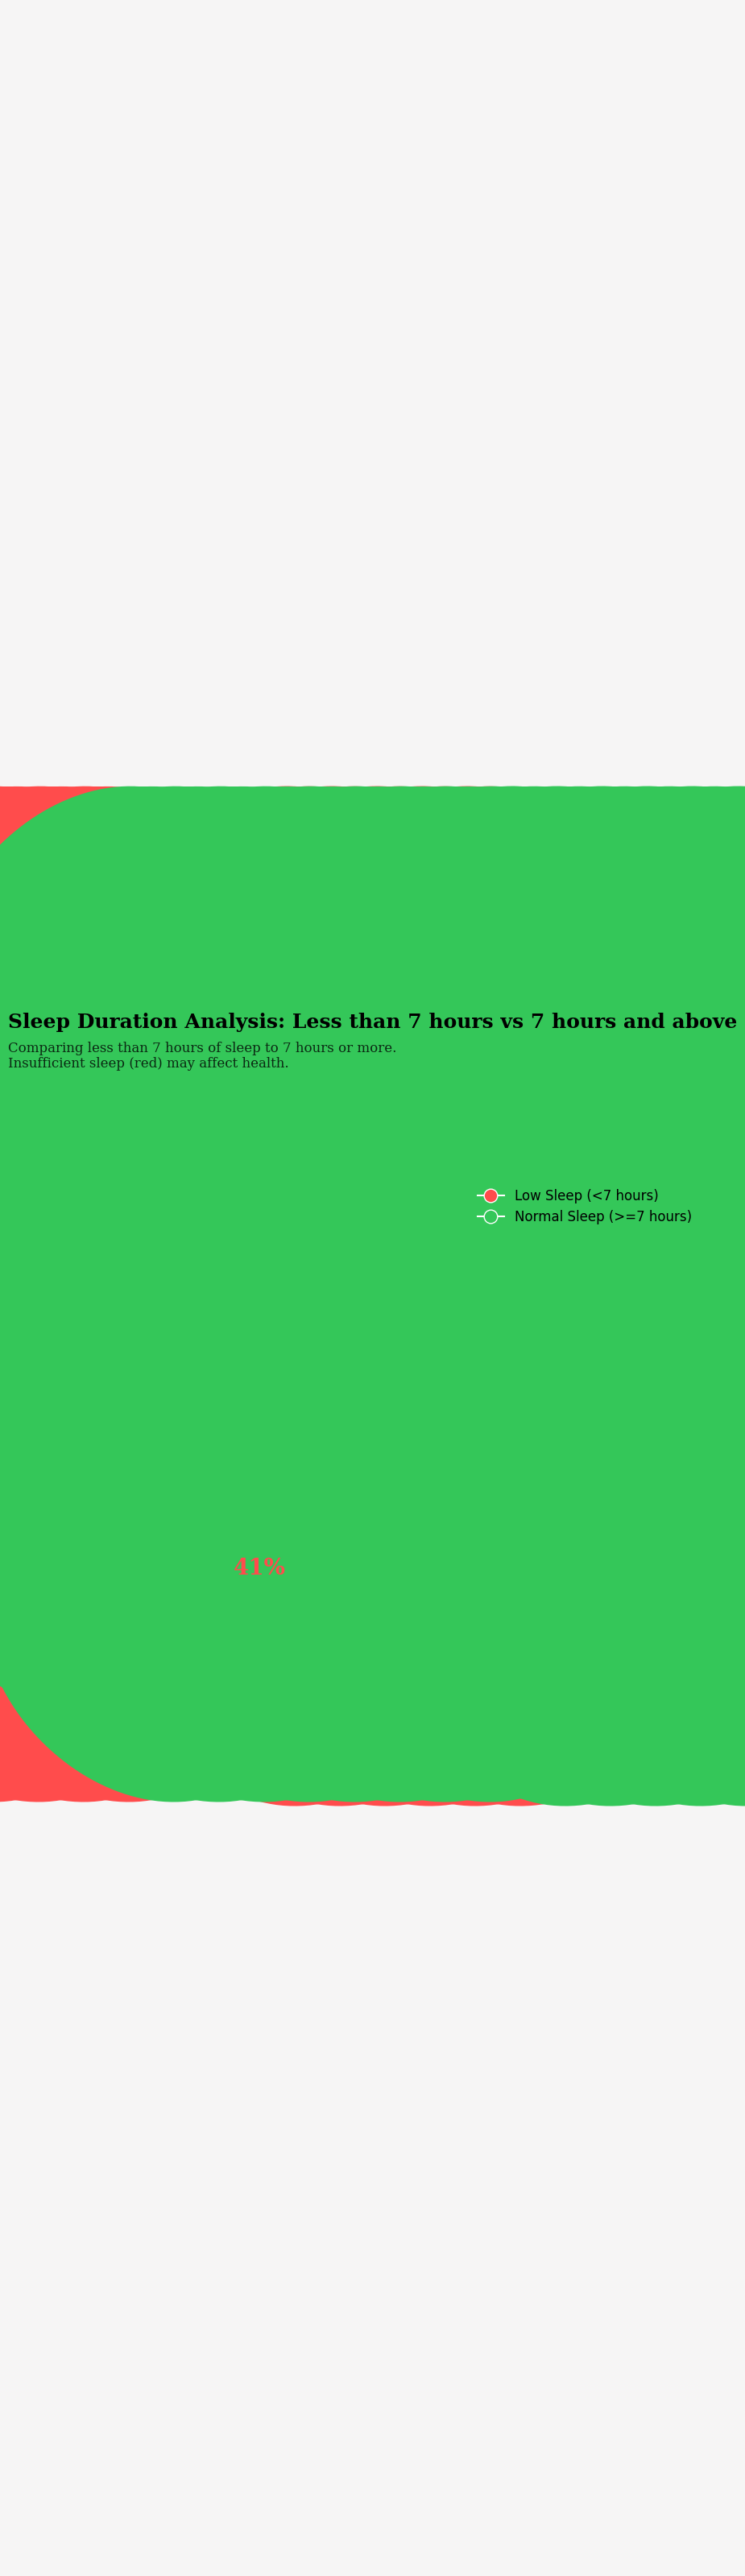

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

# --- 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ïù¥Ï†ÑÍ≥º ÎèôÏùº) ---
# Ïù¥ Î∂ÄÎ∂ÑÏùÄ ÏÇ¨Ïö©ÏûêÏùò Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(df)ÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§.
# ÏòàÏãú Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì≠ÎãàÎã§.

low_sleep = df[df['Sleep Duration'] < 7]['Sleep Duration'].count()
normal_sleep = df[df['Sleep Duration'] >= 7]['Sleep Duration'].count()
total_sleep = low_sleep + normal_sleep
low_sleep_percentage = int(round(low_sleep / total_sleep * 100, 0))
normal_sleep_percentage = int(round(normal_sleep / total_sleep * 100, 0))


# --- 2. Figure Î∞è Waffle Chart ÏÉùÏÑ± ---
fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    columns=14,
    values={"Low Sleep (<7 hours)": low_sleep, "Normal Sleep (>=7 hours)": normal_sleep},
    colors=['#ff4c4c', '#34c759'],
    icons='bed',
    icon_size=20,
    # ‚úÖ Ï§ëÏöî: ÏûêÎèô Î≤îÎ°Ä Í∏∞Îä•ÏùÑ ÎÅïÎãàÎã§.
    icon_legend=False,
    figsize=(10, 7),  # Í∞ÄÎ°ú Í∏∏Ïù¥Î•º Ï°∞Í∏à ÎäòÎ†§ ÌÖçÏä§Ìä∏ Í≥µÍ∞Ñ ÌôïÎ≥¥
    facecolor='#f6f5f5',
    dpi=100
)

# --- 3. ÌÖçÏä§Ìä∏ Î∞è Î≤îÎ°Ä Ï∂îÍ∞Ä ---
# fig.text()Î•º ÏÇ¨Ïö©Ìï¥ Figure Í∞ùÏ≤¥Ïóê ÏßÅÏ†ë ÌÖçÏä§Ìä∏Î•º Ï∂îÍ∞Ä
fig.text(0.02, 0.95, 'Sleep Duration Analysis: Less than 7 hours vs 7 hours and above',
         fontdict={'font': 'Serif', 'size': 18, 'color': 'black', 'weight': 'bold'})
fig.text(0.02, 0.88, 'Comparing less than 7 hours of sleep to 7 hours or more.\nInsufficient sleep (red) may affect health.',
         fontdict={'font': 'Serif', 'size': 12, 'color': 'black'}, alpha=0.8)

# Î∞±Î∂ÑÏú® ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
fig.text(0.3, -0.02, f'{low_sleep_percentage}%', {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#ff4c4c'})
fig.text(0.7, -0.02, f'{normal_sleep_percentage}%', {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#34c759'})


# ÏàòÎèôÏúºÎ°ú Î≤îÎ°ÄÎ•º ÏÉùÏÑ±ÌïòÍ≥† ÏúÑÏπòÎ•º ÏßÄÏ†ï
plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff4c4c', markersize=12, label='Low Sleep (<7 hours)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#34c759', markersize=12, label='Normal Sleep (>=7 hours)')
    ],
    # ‚úÖ Ï§ëÏöî: Î≤îÎ°Ä ÏúÑÏπòÎ•º Ï∞®Ìä∏ Ïò§Î•∏Ï™Ω ÏÉÅÎã®ÏúºÎ°ú Î™ÖÌôïÌûà ÏßÄÏ†ï
    loc='upper right',
    bbox_to_anchor=(0.98, 0.85), # (x, y) Ï¢åÌëúÎ°ú ÎØ∏ÏÑ∏ Ï°∞Ï†ï
    frameon=False,
    fontsize=12
)

# --- 4. ÏµúÏ¢Ö Figure ÌëúÏãú ---
# Î∂àÌïÑÏöîÌïú tight_layout()ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Î∞îÎ°ú show() Ìò∏Ï∂ú
plt.show()

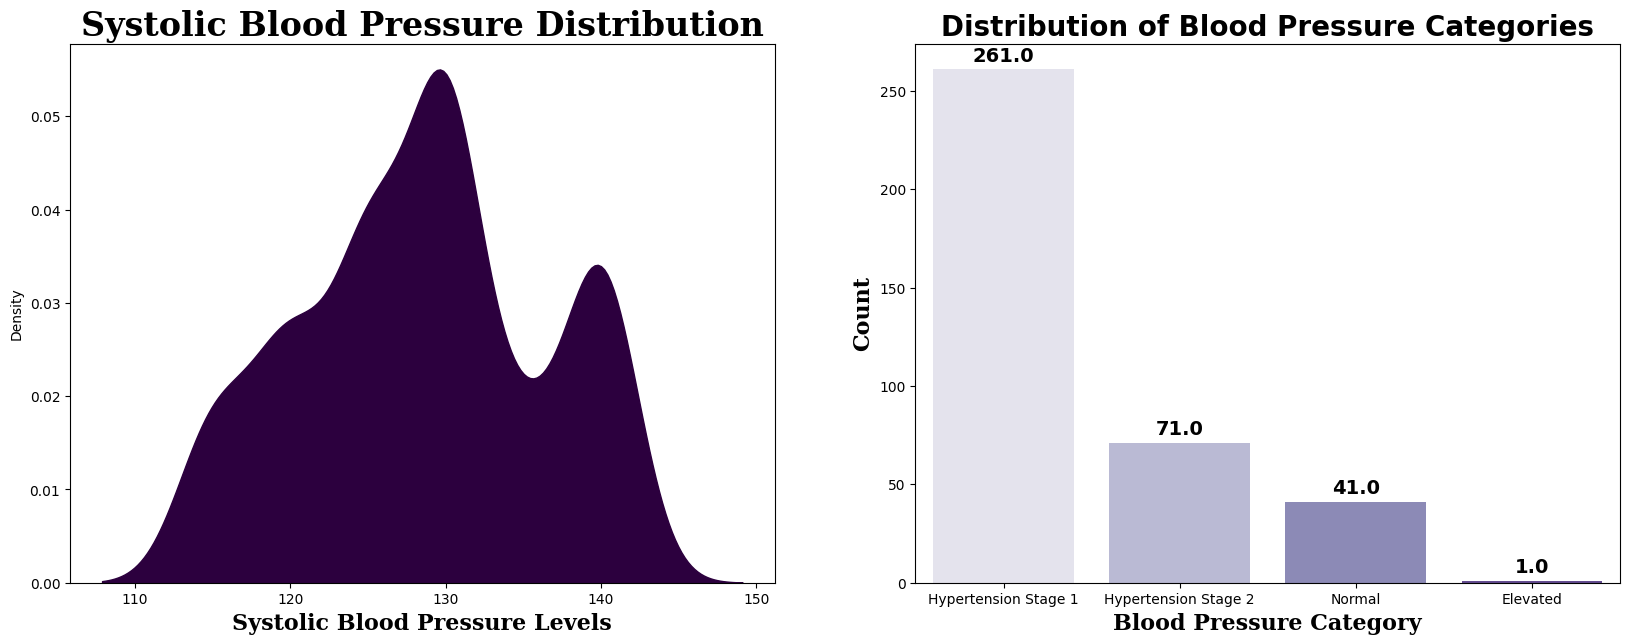

In [45]:
df1['Systolic'] = df1['Blood Pressure'].str.split('/', expand=True)[0].astype(int)
df1['Diastolic'] = df1['Blood Pressure'].str.split('/', expand=True)[1].astype(int)

def categorize_blood_pressure(systolic, diastolic):
    if systolic < 90 and diastolic < 60:
        return 'Low'
    elif 90 <= systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

df1['Blood Pressure Category'] = df1.apply(lambda row: categorize_blood_pressure(row['Systolic'], row['Diastolic']), axis=1)

fig, (ax2, ax) = plt.subplots(1, 2, figsize=(20, 7))


sns.kdeplot(data=df1, x='Systolic', ax=ax2, shade=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Systolic Blood Pressure Levels', fontdict={'font': 'Serif', 'color': 'black', 'fontsize': 16, 'weight': 'bold'})
ax2.set_title('Systolic Blood Pressure Distribution', fontdict={'font': 'Serif', 'color': 'black', 'weight': 'bold', 'fontsize': 24})

sns.countplot(data=df1, x='Blood Pressure Category', ax=ax, palette='Purples')

ax.set_xlabel('Blood Pressure Category', fontdict={'font': 'Serif', 'color': 'black', 'fontsize': 16, 'weight': 'bold'})
ax.set_ylabel('Count', fontdict={'font': 'Serif', 'color': 'black', 'fontsize': 16, 'weight': 'bold'})

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, weight='bold', color='black', 
                xytext=(0, 10), textcoords='offset points')

ax.set_title('Distribution of Blood Pressure Categories', fontsize=20, weight='bold')

plt.show()